In [154]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from tabulate import tabulate
from pymatgen.core.operations import SymmOp
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display


In [155]:
mp_key = "saKvn4nYOR6knw5q6WoAxtMKCsoAG1gq"
mp_id = "mp-561586"

In [156]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    parser = CifWriter(prim_struc)
    parser.write_file('mystructure.cif')


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [157]:
Sym1 = SymmOp.from_xyz_str('-y,-x,z') 
Sym2 = SymmOp.from_xyz_str('x+2/3, y+1/3, z+1/3')
Sym3 = SymmOp.from_xyz_str('y+1/3, x+2/3, -z+2/3')

In [158]:
CsSym1 = Sym1.operate(Cs)
LaSym2 = Sym2.operate(La)
SSym3 = Sym3.operate(S)

Opération de symétrie 1 : Plan miroir

In [159]:

    
    print('Opération de symétrie : plan miroir défini par (-y, -x, z)')
    print("L'opérateur de réflexion associé à cette opération est :")    
    print(Sym2.rotation_matrix)
    print("Ce plan miroir est perpendiculaire à la direction [1 1 0] passant par l'origine. Le déterminant de cette matrice vaut -1. C'est une opération de deuxième espèce qui inverse la chiralité.")
    print(' ')
    print("La position de départ, (x, y, z), de tout atome devient (-y, -x, z) par l'équation suivante :")

Opération de symétrie : plan miroir défini par (-y, -x, z)
L'opérateur de réflexion associé à cette opération est :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Ce plan miroir est perpendiculaire à la direction [1 1 0] passant par l'origine. Le déterminant de cette matrice vaut -1. C'est une opération de deuxième espèce qui inverse la chiralité.
 
La position de départ, (x, y, z), de tout atome devient (-y, -x, z) par l'équation suivante :


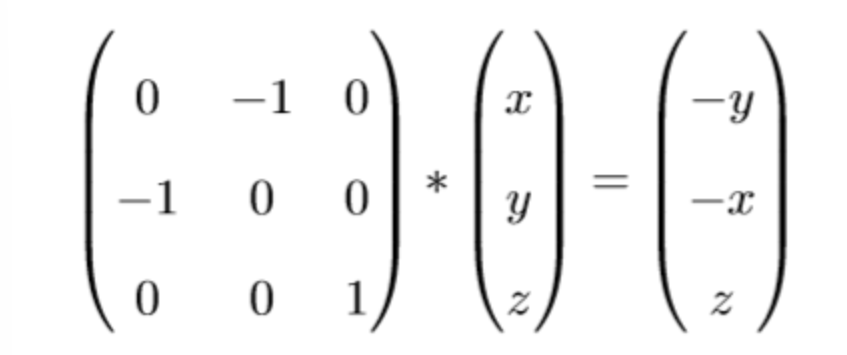

In [160]:
print("Plan miroir décrit ci-dessus appliqué à l'atome de La situé en (0,0,0.5)")
print("L'atome de La est envoyé sur la position d'un atome équivalent. Dans ce cas-ci, il est envoyé sur sa propre position à savoir (0,0,0.5). En effet, la position de son image après avoir subi l'élément de symétrie nous est donnée par la matrice de coordonnées suivante :")
print(Sym1.operate((0,0,0.5)))
print(' ')
print("Sur les figures ci-dessous, on voit bien que comme l'atome de La est situé sur le plan miroir, il est transformé en lui même.")


Plan miroir décrit ci-dessus appliqué à l'atome de La situé en (0,0,0.5)
L'atome de La est envoyé sur la position d'un atome équivalent. Dans ce cas-ci, il est envoyé sur sa propre position à savoir (0,0,0.5). En effet, la position de son image après avoir subi l'élément de symétrie nous est donnée par la matrice de coordonnées suivante :
[0.  0.  0.5]
 
Sur les figures ci-dessous, on voit bien que comme l'atome de La est situé sur le plan miroir, il est transformé en lui même.


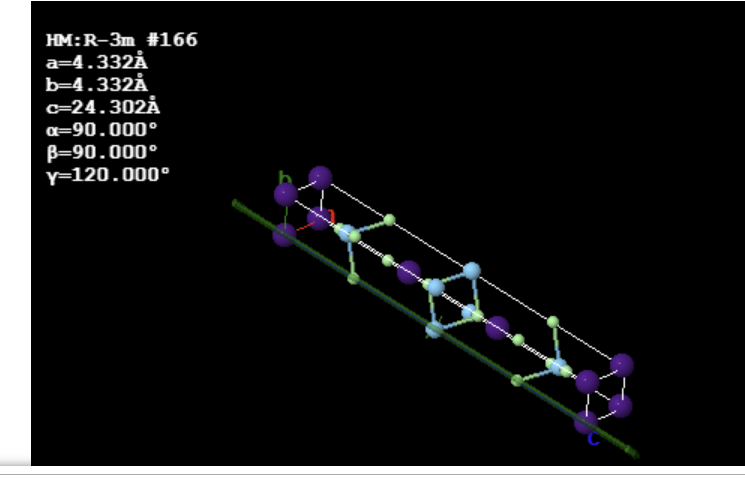

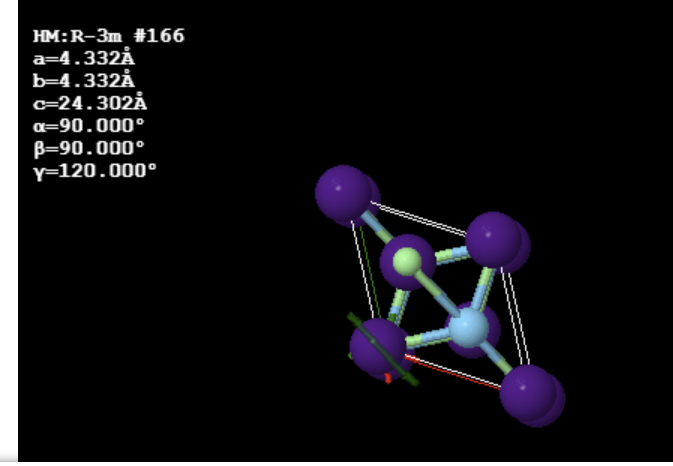

In [161]:
 print("Pour un atome situé en dehors du plan miroir, l'atome est bien envoyé sur son image par une réflexion. La flèche turquoise montre sur quelle position équivalente le plan miroir envoie cet atome de S.")

Pour un atome situé en dehors du plan miroir, l'atome est bien envoyé sur son image par une réflexion. La flèche turquoise montre sur quelle position équivalente le plan miroir envoie cet atome de La.


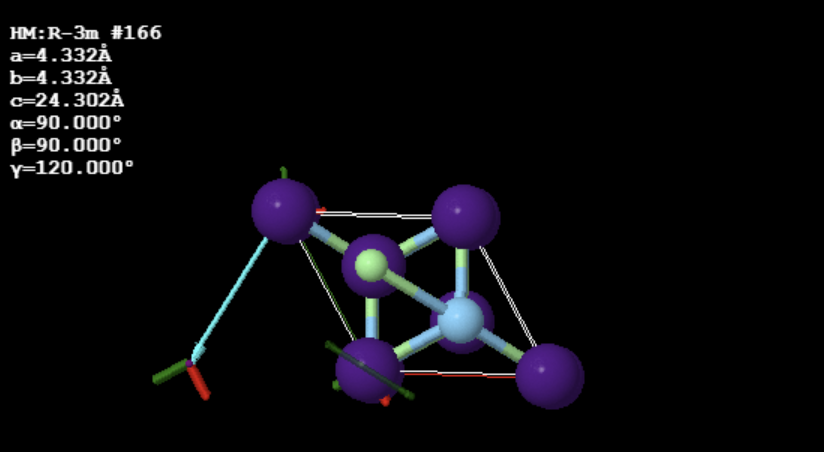

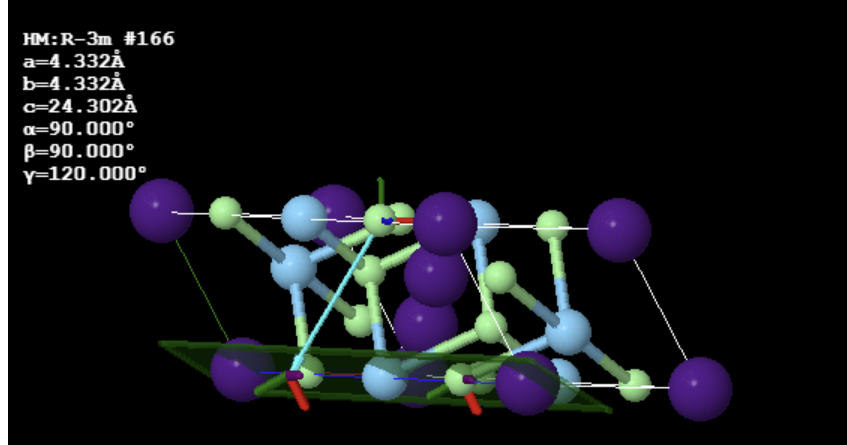

In [162]:
print("Ici, il est envoyé sur la position équivalente à sa position de départ mais ce dans la maille voisine.")


Ici, il est envoyé sur la position équivalente à sa position de départ mais ce dans la maille voisine.


Opération de symétrie 2 : Translation

In [163]:
print('Opération de symétrie : translation définie par (x+2/3, y+1/3, z+1/3)')
print("L'opérateur associée à cette opération est :")
print(Sym2.rotation_matrix) 
print(' ')
print("La position de départ, (x, y, z), de tout atome devient (x+2/3, y+1/3, z+1/3) par la matrice de translation suivante. Autrement dit, on ajoute aux coordonnées de tout atome le vecteur de coordonées suivant : ")
print(Sym2.translation_vector)
print("Ou on peut également obtenir la position de l'atome équivalent sur laquelle il est envoyé par l'équation suivante :")

Opération de symétrie : translation définie par (x+2/3, y+1/3, z+1/3)
L'opérateur associée à cette opération est :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
La position de départ, (x, y, z), de tout atome devient (x+2/3, y+1/3, z+1/3) par la matrice de translation suivante. Autrement dit, on ajoute aux coordonnées de tout atome le vecteur de coordonées suivant : 
[0.66666667 0.33333333 0.33333333]
Ou on peut également obtenir la position de l'atome équivalent sur laquelle il est envoyé par l'équation suivante :


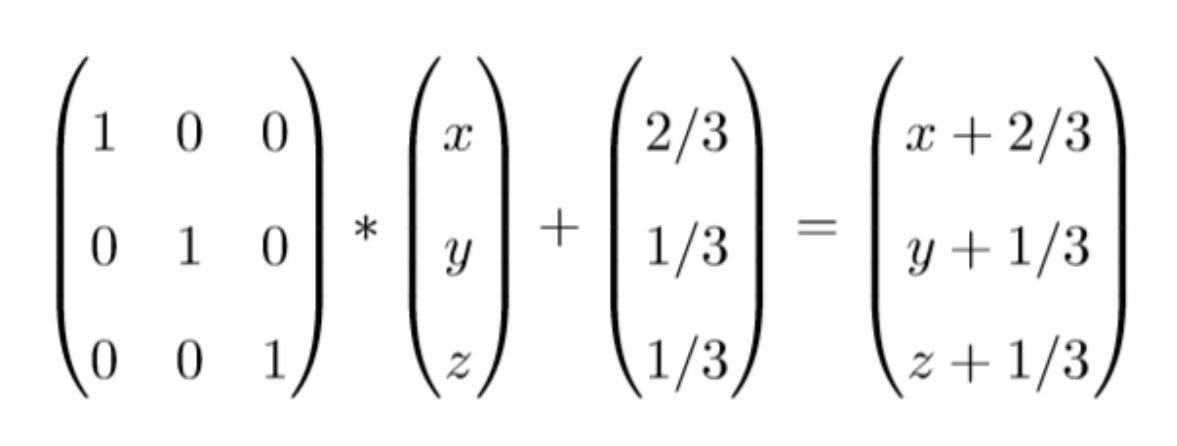

In [164]:
 print("Translation décrite ci-dessus appliquée à un atome d'S situé en (0.67,0.33,0.07)")
print("L'atome d'S est envoyé sur la position d'un atome équivalent et celle-ci est donnée par la matrice de coordonnées-ci dessous :")
print(Sym2.operate((0.67,0.33,0.07)))
print(' ')
print("Le flèche jaune illustre le lien entre l’atome et son image par l’élément de symétrie. L'atome et son image ne se trouvent pas dans la même maille. Dans la maille de départ, la position de l'atome équivalent est (0.33,0.67,0.4)")
print("Sur les figures ci-dessous, on peut voir ce qu'il se passe lorqu'un atome est translaté par la matrice ci-dessus.")

**Translation décrite ci-dessus appliquée à un atome d'S situé en (0.67,0.33,0.07)**
L'atome d'S est envoyé sur la position d'un atome équivalent et celle-ci est donnée par la matrice de coordonnées-ci dessous :
[1.33666667 0.66333333 0.40333333]
 
Le flèche jaune illustre le lien entre l’atome et son image par l’élément de symétrie. L'atome et son image ne se trouvent pas dans la même maille. Dans la maille de départ, la position de l'atome équivalent est (0.33,0.67,0.4)
Sur les figures ci-dessous, on peut voir ce qu'il se passe lorqu'un atome est translaté par la matrice ci-dessus.


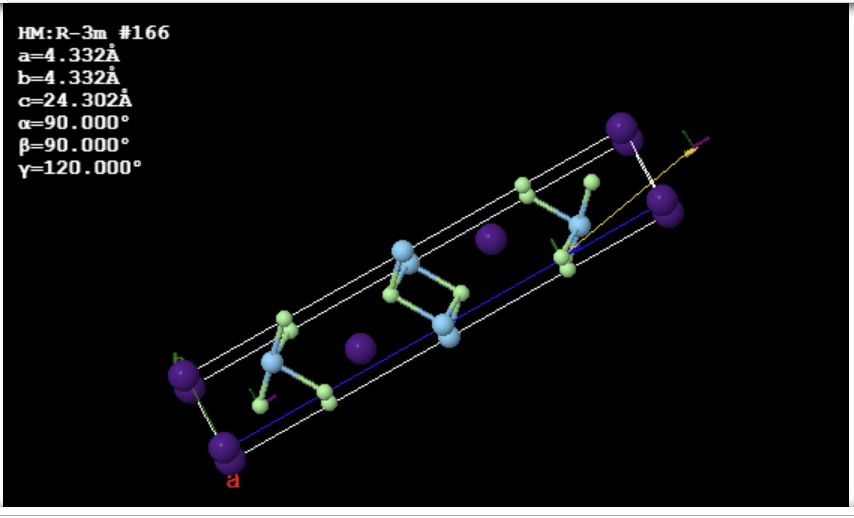

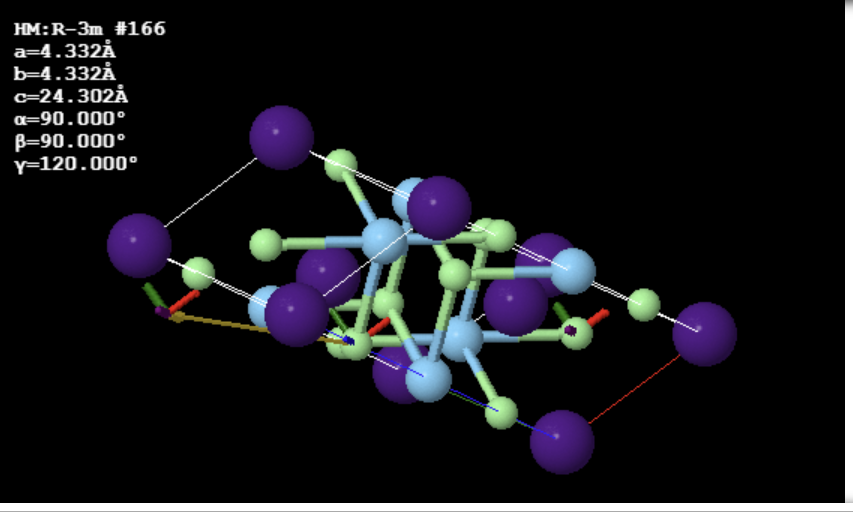

Opération de symétrie 3 :  Rotation hélicoïdale

In [165]:

print("**Opération de symétrie : rotation hélicoïdale d'ordre 2\u2081 (y+1/3, x+2/3, -z+2/3)**")
print("L'opérateur associée à cette opération de symétrie est :")
print(Sym3.rotation_matrix)
print("Le déterminant de cette matrice vaut 1. C'est une opération de première espèce qui conserve la chiralité.")
print(' ')
print("La position de départ, (x, y, z), de tout atome devient (y+1/3, x+2/3, -z+2/3) par l'équation suivante :")

**Opération de symétrie : rotation hélicoïdale d'ordre 2₁ (y+1/3, x+2/3, -z+2/3)**
L'opérateur associée à cette opération de symétrie est :
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
Le déterminant de cette matrice vaut 1. C'est une opération de première espèce qui conserve la chiralité.
 
La position de départ, (x, y, z), de tout atome devient (y+1/3, x+2/3, -z+2/3) par l'équation suivante :


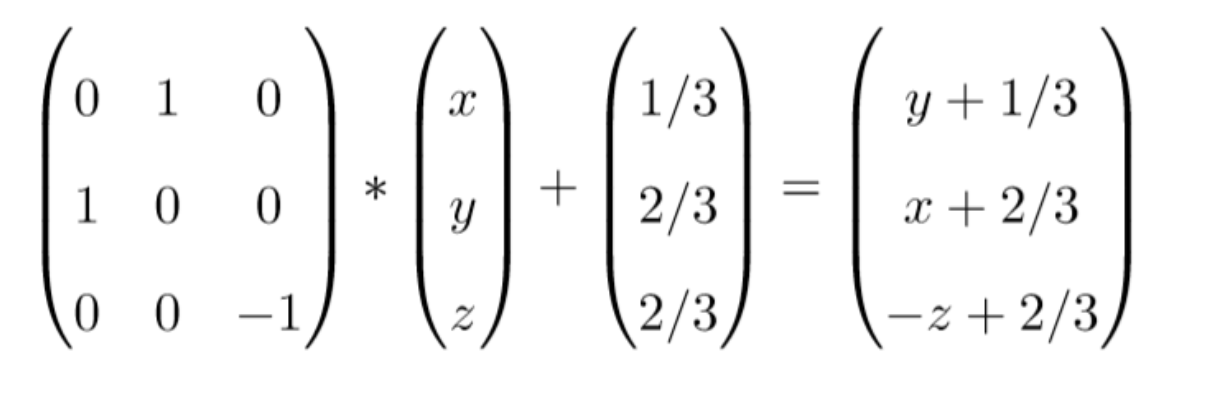

In [166]:
 print("Rotation hélicoïdale d'ordre 2\u2081 , décrite ci-dessus appliquée au Cs situé en (0,0,1)")
print("L'atome Cs subit une rotation de 180° dans le sens anti-horlogique et puis une translation de 1/2 du vecteur de base. Ce parallèlement à l'axe hélicoïdal. Autrement dit, les coordonnées de son image par l'élément de symétrie sont données par le vecteur de coordonnées-ci dessous :")
print(Sym3.operate((0,0,1)))
print(' ')
print("Encore une fois, l'atome et son image ne se trouvent pas dans la même maille. Dans la maille sitée à l'origine du repère, la position équivalente est (0.33,0.67,0.67).")
print("Sur les figures ci-dessous, on peut voir ce qu'il se passe lorqu'un atome subit la rotation hélicoïdale décrite par la matrice ci-dessus.")

**Rotation hélicoïdale d'ordre 2₁ , décrite ci-dessus appliquée au Cs situé en (0,0,1)**
L'atome Cs subit une rotation de 180° dans le sens anti-horlogique et puis une translation de 1/2 du vecteur de base. Ce parallèlement à l'axe hélicoïdal. Autrement dit, les coordonnées de son image par l'élément de symétrie sont données par le vecteur de coordonnées-ci dessous :
[ 0.33333333  0.66666667 -0.33333333]
 
Encore une fois, l'atome et son image ne se trouvent pas dans la même maille. Dans la maille sitée à l'origine du repère, la position équivalente est (0.33,0.67,0.67).
Sur les figures ci-dessous, on peut voir ce qu'il se passe lorqu'un atome subit la rotation hélicoïdale décrite par la matrice ci-dessus.


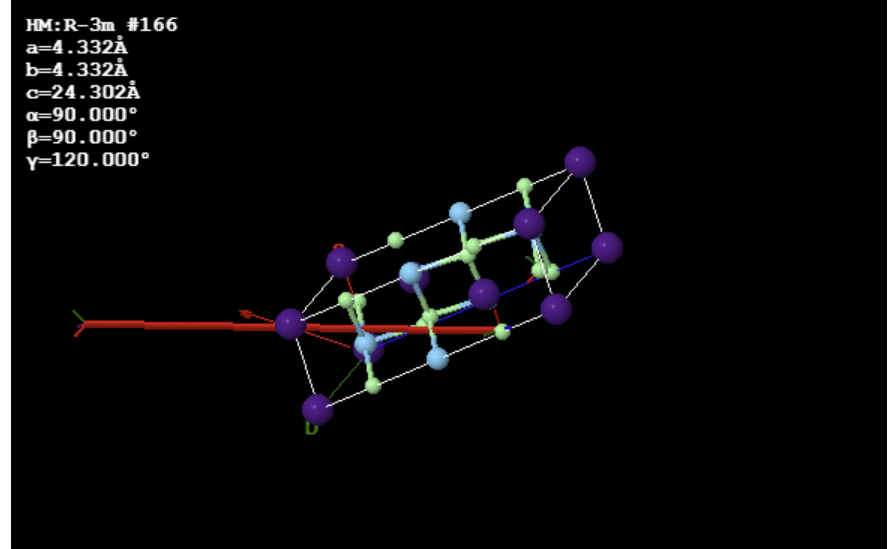

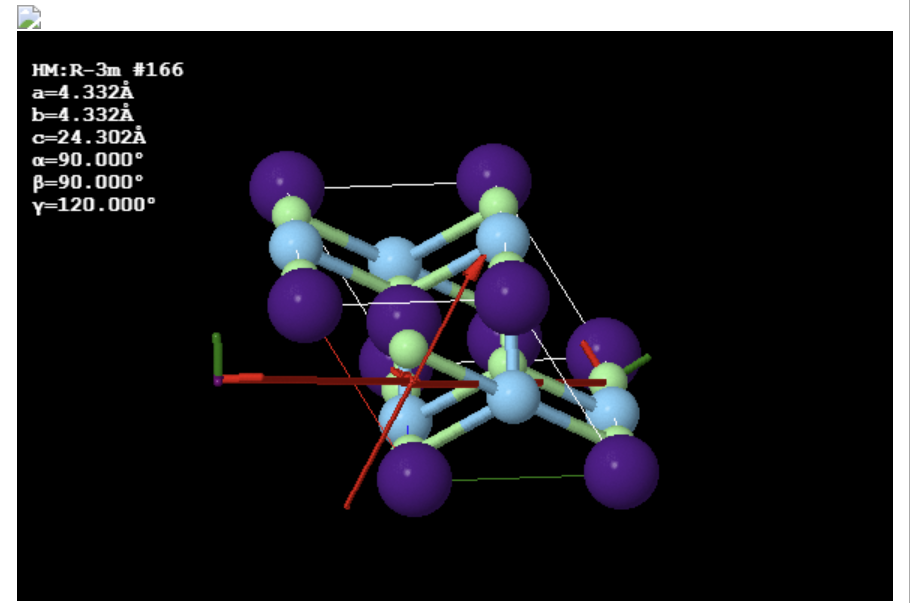